In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import polars as pl
import seaborn as sns

In [2]:
notebook_dir = Path().resolve()
DATA_DIR = notebook_dir.parents[1].joinpath("data")
DATASET_DIR = DATA_DIR.joinpath("atmaCup#18_dataset")
TR_FEATURES_CSV = DATASET_DIR.joinpath("train_features.csv")
TS_FEATURES_CSV = DATASET_DIR.joinpath("test_features.csv")
IMAGES_DIR = DATASET_DIR.joinpath("images")
TRAFFIC_LIGHTS_CSV = DATASET_DIR.joinpath("traffic_lights.csv")

In [3]:
tr_df = pl.read_csv(TR_FEATURES_CSV)
tr_df

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker,x_0,y_0,z_0,x_1,y_1,z_1,x_2,y_2,z_2,x_3,y_3,z_3,x_4,y_4,z_4,x_5,y_5,z_5
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""00066be8e20318869c38c66be46663…",5.701526,1.538456,-2.165777,-139.0,0.0,false,0.25,true,"""drive""",false,false,2.82959,0.032226,0.045187,6.231999,0.065895,0.107974,9.785009,0.124972,0.203649,13.485472,0.163448,0.302818,17.574227,0.174289,0.406331,21.951269,0.199503,0.485079
"""00066be8e20318869c38c66be46663…",11.176292,0.279881,-11.625697,-44.0,0.0,false,0.0,false,"""drive""",false,true,4.970268,-0.007936,0.005028,10.350489,-0.032374,-0.020701,15.770054,0.084073,0.008645,21.132415,0.391343,0.036335,26.316489,0.843124,0.065,31.383814,1.42507,0.073083
"""00066be8e20318869c38c66be46663…",10.472548,0.231099,-2.985105,-132.0,0.0,false,0.18,true,"""drive""",false,false,4.815701,-0.000813,0.017577,10.153522,-0.0278,0.026165,15.446539,-0.155987,0.040397,20.61816,-0.356932,0.058765,25.677387,-0.576985,0.102859,30.460033,-0.841894,0.152889
"""000fb056f97572d384bae4f5fc1e0f…",6.055565,-0.117775,7.632668,173.0,0.0,false,0.0,false,"""drive""",false,false,2.812608,0.033731,0.0059,5.975378,0.137848,0.01621,9.186793,0.322997,0.031626,12.37311,0.603145,0.031858,15.703514,0.960717,0.043479,19.311182,1.374655,0.058754
"""000fb056f97572d384bae4f5fc1e0f…",3.316744,1.276733,-31.725477,-114.0,0.0,false,0.255,true,"""drive""",false,false,1.55186,-0.041849,-0.008847,3.675162,-0.125189,-0.013725,6.113567,-0.239161,-0.012887,8.770783,-0.381813,-0.003898,11.619313,-0.554488,0.011393,14.657048,-0.7788,0.044243
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""fff88cca5f8a012427b96bdde66011…",-0.0,-0.0,16.102747,-1.0,0.0,true,0.0,false,"""drive""",false,true,0.00514,0.002648,-0.006207,0.013328,0.005834,-0.016368,0.019618,0.007763,-0.023074,0.028672,0.010737,-0.033795,0.0342,0.012502,-0.040583,0.043196,0.015644,-0.051309
"""fff88cca5f8a012427b96bdde66011…",1.594968,0.350129,-5.791823,-97.0,0.0,false,0.0,false,"""drive""",false,true,0.663311,-0.002493,-0.009528,1.516447,-0.004223,-0.020431,2.425366,-0.002958,-0.023108,3.319161,-0.012259,-0.027327,4.106655,-0.023314,-0.024449,4.708509,-0.027916,-0.026821
"""fff88cca5f8a012427b96bdde66011…",-0.004207,-0.037833,-2.089301,0.0,0.0,true,0.0,false,"""drive""",false,true,0.022788,0.000622,-0.006612,0.046445,0.001039,-0.017674,0.062182,0.000714,-0.024352,0.079601,0.000491,-0.034149,0.091362,-0.000041,-0.039632,0.10623,-0.001123,-0.04789


In [4]:
ts_df = pl.read_csv(TS_FEATURES_CSV)
ts_df

ID,vEgo,aEgo,steeringAngleDeg,steeringTorque,brake,brakePressed,gas,gasPressed,gearShifter,leftBlinker,rightBlinker
str,f64,f64,f64,f64,f64,bool,f64,bool,str,bool,bool
"""012baccc145d400c896cb82065a93d…",3.374273,-0.01936,-34.008415,17.0,0.0,false,0.0,false,"""drive""",false,false
"""012baccc145d400c896cb82065a93d…",2.441048,-0.022754,307.860077,295.0,0.0,true,0.0,false,"""drive""",false,false
"""012baccc145d400c896cb82065a93d…",3.604152,-0.286239,10.774388,-110.0,0.0,true,0.0,false,"""drive""",false,false
"""012baccc145d400c896cb82065a93d…",2.048902,-0.537628,61.045235,189.0,0.0,true,0.0,false,"""drive""",true,false
"""01d738e799d260a10f6324f78023b3…",2.201528,-1.8986,5.740093,-41.0,0.0,true,0.0,false,"""drive""",false,false
…,…,…,…,…,…,…,…,…,…,…,…
"""ff4f00a76fbf4db0cb15579c7c6086…",14.528915,0.553588,1.450901,119.0,0.0,false,0.025,true,"""drive""",false,false
"""ff4f00a76fbf4db0cb15579c7c6086…",15.489772,0.311154,-1.327874,-124.0,0.0,false,0.355,true,"""drive""",false,false
"""ff4f00a76fbf4db0cb15579c7c6086…",16.470867,-0.021787,-1.826507,-105.0,0.0,false,0.22,true,"""drive""",false,false


In [5]:
traffic_lights_df = pl.read_csv(TRAFFIC_LIGHTS_CSV)
traffic_lights_df

ID,index,class,bbox_upper_left_x,bbox_upper_left_y,bbox_lower_right_x,bbox_lower_right_y
str,i64,str,f64,f64,f64,f64
"""00066be8e20318869c38c66be46663…",null,null,null,null,null,null
"""00066be8e20318869c38c66be46663…",null,null,null,null,null,null
"""00066be8e20318869c38c66be46663…",null,null,null,null,null,null
"""000fb056f97572d384bae4f5fc1e0f…",null,null,null,null,null,null
"""000fb056f97572d384bae4f5fc1e0f…",1,"""green""",63.533428,10.685698,65.621597,11.599558
…,…,…,…,…,…,…
"""fff88cca5f8a012427b96bdde66011…",null,null,null,null,null,null
"""fff88cca5f8a012427b96bdde66011…",null,null,null,null,null,null
"""fff88cca5f8a012427b96bdde66011…",null,null,null,null,null,null


In [6]:
tr_traffic_lights_df = traffic_lights_df.filter(
    pl.col("ID").is_in(tr_df.get_column("ID").unique())
)
display(tr_traffic_lights_df)

ts_traffic_lights_df = traffic_lights_df.filter(
    pl.col("ID").is_in(ts_df.get_column("ID").unique())
)
display(ts_traffic_lights_df)

ID,index,class,bbox_upper_left_x,bbox_upper_left_y,bbox_lower_right_x,bbox_lower_right_y
str,i64,str,f64,f64,f64,f64
"""00066be8e20318869c38c66be46663…",null,null,null,null,null,null
"""00066be8e20318869c38c66be46663…",null,null,null,null,null,null
"""00066be8e20318869c38c66be46663…",null,null,null,null,null,null
"""000fb056f97572d384bae4f5fc1e0f…",null,null,null,null,null,null
"""000fb056f97572d384bae4f5fc1e0f…",1,"""green""",63.533428,10.685698,65.621597,11.599558
…,…,…,…,…,…,…
"""fff88cca5f8a012427b96bdde66011…",null,null,null,null,null,null
"""fff88cca5f8a012427b96bdde66011…",null,null,null,null,null,null
"""fff88cca5f8a012427b96bdde66011…",null,null,null,null,null,null


ID,index,class,bbox_upper_left_x,bbox_upper_left_y,bbox_lower_right_x,bbox_lower_right_y
str,i64,str,f64,f64,f64,f64
"""012baccc145d400c896cb82065a93d…",null,null,null,null,null,null
"""012baccc145d400c896cb82065a93d…",null,null,null,null,null,null
"""012baccc145d400c896cb82065a93d…",null,null,null,null,null,null
"""012baccc145d400c896cb82065a93d…",null,null,null,null,null,null
"""01d738e799d260a10f6324f78023b3…",null,null,null,null,null,null
…,…,…,…,…,…,…
"""ff4f00a76fbf4db0cb15579c7c6086…",null,null,null,null,null,null
"""ff4f00a76fbf4db0cb15579c7c6086…",null,null,null,null,null,null
"""ff4f00a76fbf4db0cb15579c7c6086…",null,null,null,null,null,null


## features

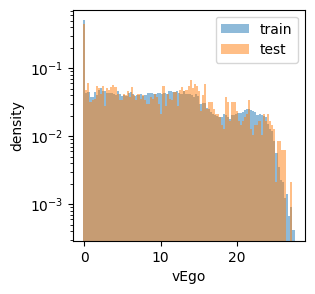

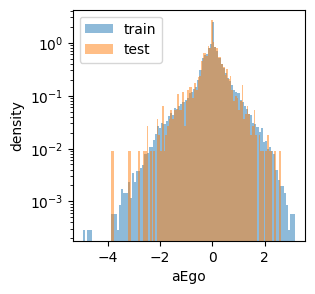

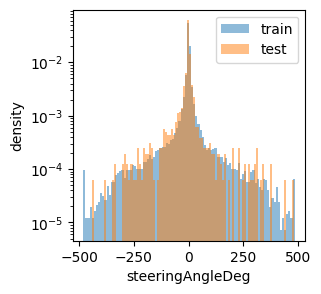

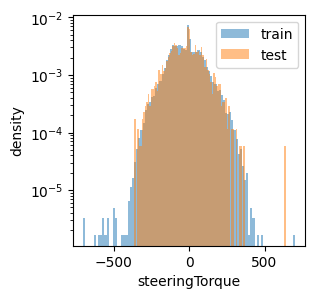

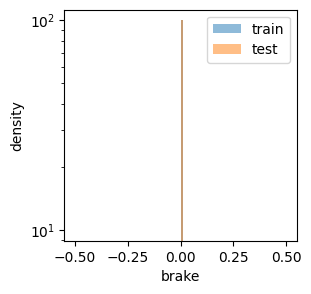

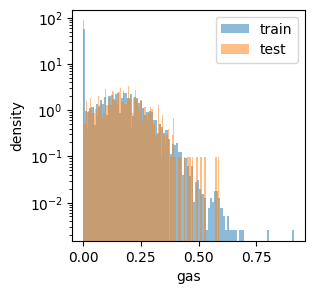

In [7]:
def hist_plot_train_test(tr_df, ts_df, col, bins=100):
    figure = plt.figure(figsize=(3, 3))
    plt.hist(
        tr_df.get_column(col),
        bins=bins,
        label="train",
        density=True,
        alpha=0.5,
        log=True,
    )
    plt.hist(
        ts_df.get_column(col),
        bins=bins,
        label="test",
        density=True,
        alpha=0.5,
        log=True,
    )
    plt.ylabel("density")
    plt.xlabel(col)
    plt.legend()
    plt.show()


cols = ["vEgo", "aEgo", "steeringAngleDeg", "steeringTorque", "brake", "gas"]

for col in cols:
    hist_plot_train_test(tr_df, ts_df, col)


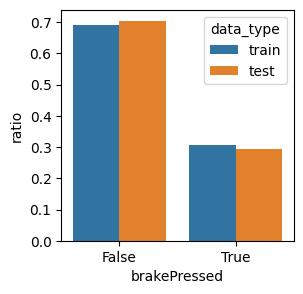

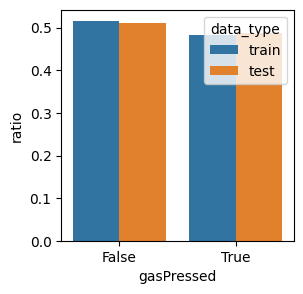

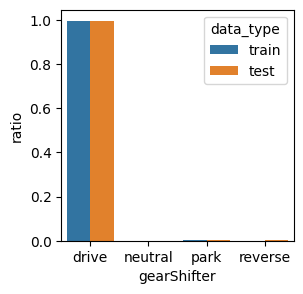

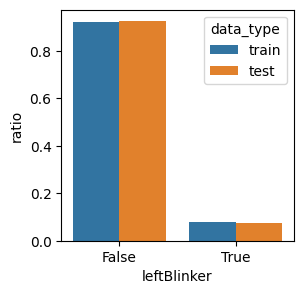

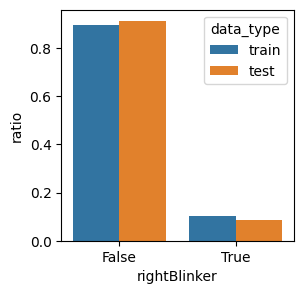

In [8]:
def barplot_train_test(
    tr_agg_df: pl.DataFrame,
    ts_agg_df: pl.DataFrame,
    x: str,
    y: str,
    figsize: tuple[float] = None,
):
    figsize = figsize if figsize is not None else (3, 3)
    figure = plt.figure(figsize=figsize)
    tmp_df = pl.concat(
        [
            tr_agg_df.with_columns(pl.lit("train").alias("data_type")),
            ts_agg_df.with_columns(pl.lit("test").alias("data_type")),
        ],
        how="vertical",
    )
    sns.barplot(data=tmp_df.to_pandas(), x=x, y=y, hue="data_type")
    plt.show()


cols = ["brakePressed", "gasPressed", "gearShifter", "leftBlinker", "rightBlinker"]

for col in cols:
    tmp_tr_df = (
        tr_df.group_by(col).agg((pl.len() / len(tr_df)).alias("ratio")).sort(col)
    )
    tmp_ts_df = (
        ts_df.group_by(col).agg((pl.len() / len(ts_df)).alias("ratio")).sort(col)
    )
    barplot_train_test(tmp_tr_df, tmp_ts_df, x=col, y="ratio")


## traffic lights

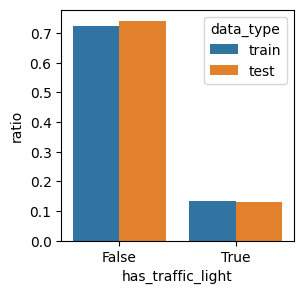

In [9]:
# 信号があるIDの割合
def _has_traffic_light_ratio_df(df: pl.DataFrame) -> pl.DataFrame:
    tmp_df = df.group_by("ID", maintain_order=True).agg(
        (pl.col("index").null_count() == 0).alias("has_traffic_light")
    )
    tmp_df = tmp_df.group_by("has_traffic_light").agg(
        (pl.len() / len(df)).alias("ratio")
    )
    return tmp_df


barplot_train_test(
    _has_traffic_light_ratio_df(tr_traffic_lights_df),
    _has_traffic_light_ratio_df(ts_traffic_lights_df),
    x="has_traffic_light",
    y="ratio",
)

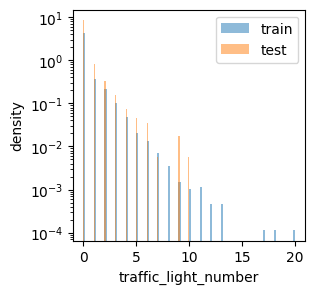

In [10]:
# 1つのIDに存在する信号の数
def _traffic_light_number_df(df: pl.DataFrame) -> pl.DataFrame:
    tmp_df = df.group_by("ID", maintain_order=True).agg(
        pl.col("index").is_not_null().sum().alias("traffic_light_number")
    )
    return tmp_df


hist_plot_train_test(
    _traffic_light_number_df(tr_traffic_lights_df),
    _traffic_light_number_df(ts_traffic_lights_df),
    col="traffic_light_number",
)

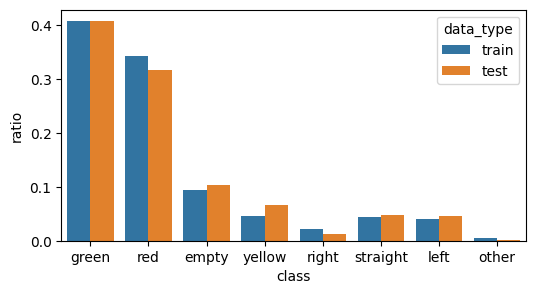

In [11]:
# 信号のclassの割合
def _traffic_light_class_ratio_df(df: pl.DataFrame) -> pl.DataFrame:
    df = df.drop_nulls(subset=["index"])

    tmp_df = df.group_by("class", maintain_order=True).agg(
        (pl.len() / len(df)).alias("ratio")
    )
    return tmp_df


barplot_train_test(
    _traffic_light_class_ratio_df(tr_traffic_lights_df),
    _traffic_light_class_ratio_df(ts_traffic_lights_df),
    x="class",
    y="ratio",
    figsize=(6, 3),
)

## targets

In [12]:
x_cols = [f"x_{i}" for i in range(6)]
y_cols = [f"y_{i}" for i in range(6)]
z_cols = [f"z_{i}" for i in range(6)]

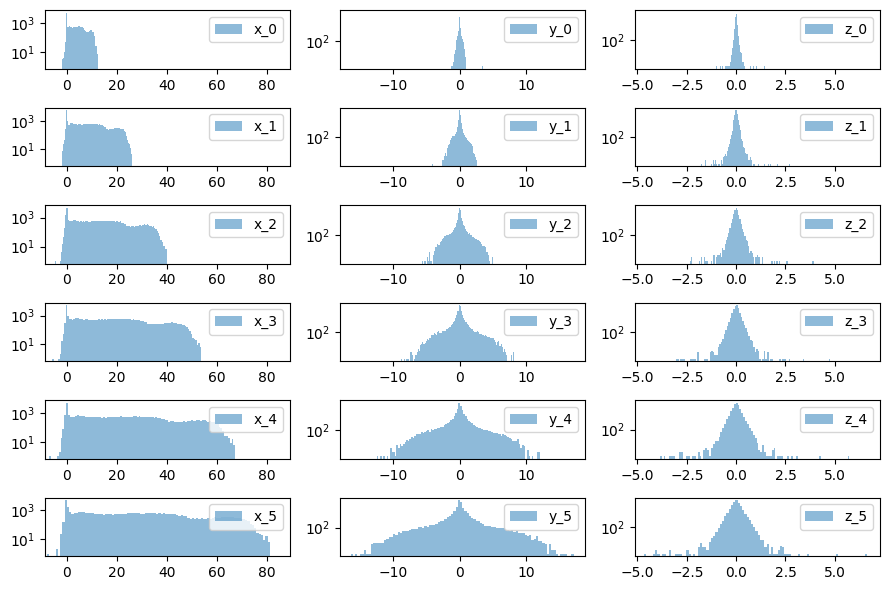

In [13]:
def plot_pos_histgram(
    df: pl.DataFrame, x_cols: list[str], y_cols: list[str], z_cols: list[str]
):
    n_cols = len(x_cols)

    cols_list = [x_cols, y_cols, z_cols]
    lim_list = [
        [
            df.select(cols).min().to_numpy().min() * 1.1,
            df.select(cols).max().to_numpy().max() * 1.1,
        ]
        for cols in cols_list
    ]

    figure, axs = plt.subplots(n_cols, 3, figsize=(3 * 3, 1 * n_cols))
    for i1, cols in enumerate(cols_list):
        for i0, col in enumerate(cols):
            ax = axs[i0, i1]
            ax.hist(df.get_column(col), bins=100, label=col, alpha=0.5, log=True)
            ax.set_xlim(*lim_list[i1])
            ax.legend(loc="upper right")
    plt.tight_layout()
    plt.show()


plot_pos_histgram(tr_df, x_cols, y_cols, z_cols)

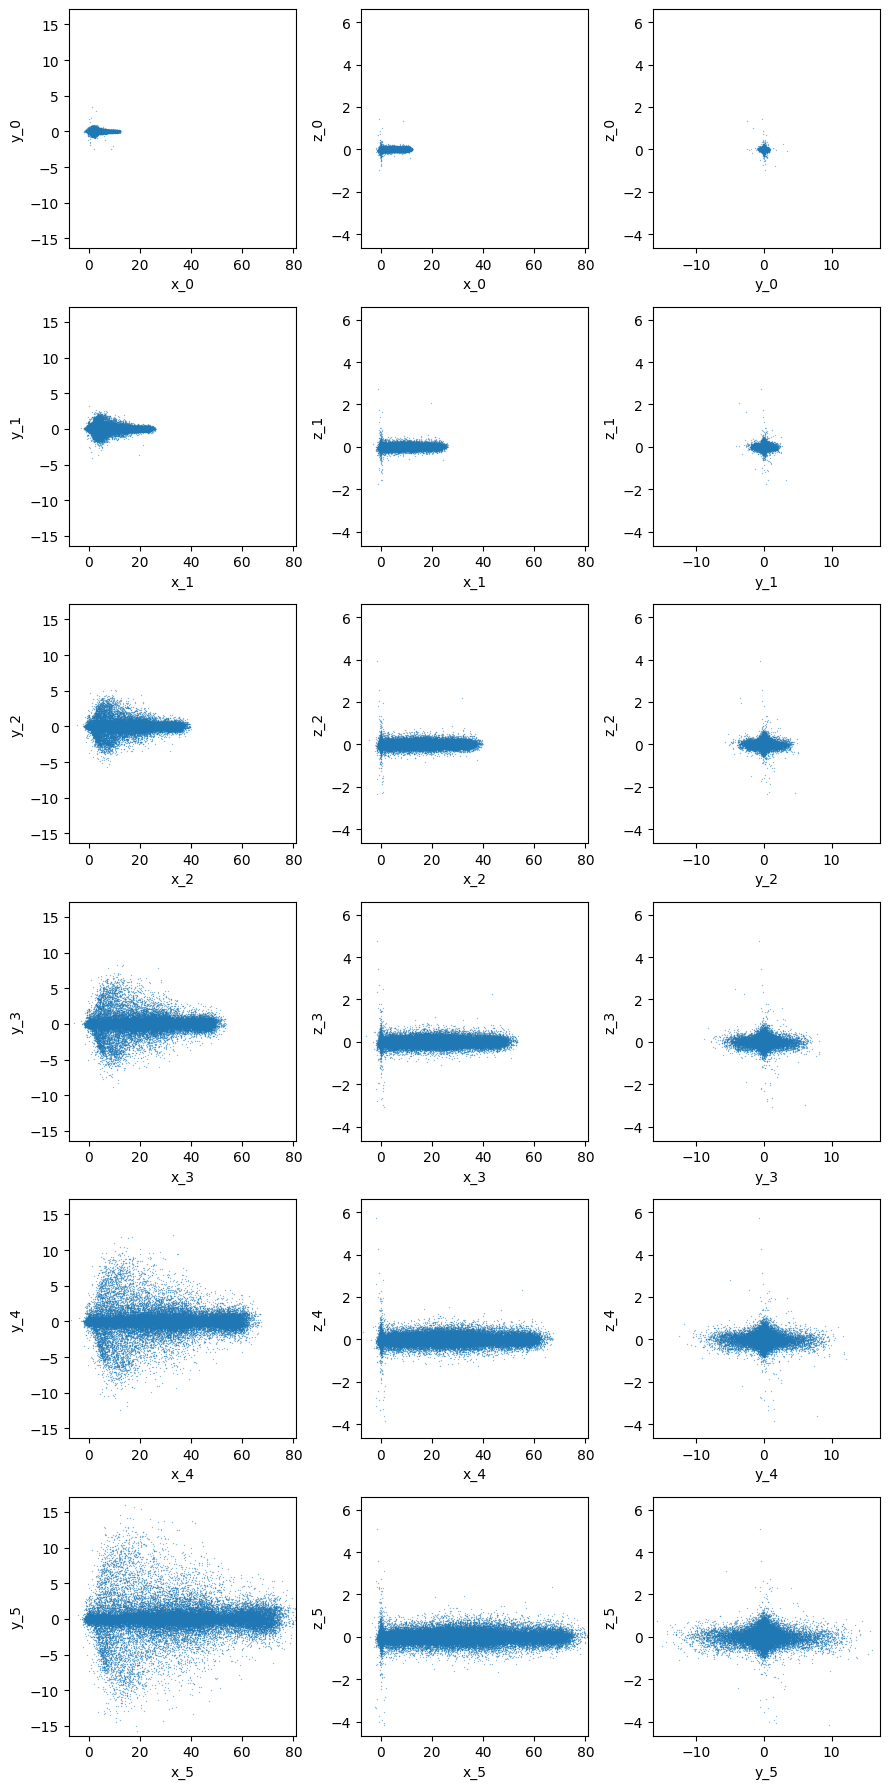

In [17]:
def plot_pos_scatter(
    df: pl.DataFrame, x_cols: list[str], y_cols: list[str], z_cols: list[str]
):
    n_cols = len(x_cols)
    cols_pairs = [
        [x_cols, y_cols],
        [x_cols, z_cols],
        [y_cols, z_cols],
    ]

    fig, axs = plt.subplots(n_cols, 3, figsize=(3 * 3, 3 * n_cols))

    for i_pair, (cols0, cols1) in enumerate(cols_pairs):
        lim0 = [
            df.select(cols0).min().to_numpy().min(),
            df.select(cols0).max().to_numpy().max(),
        ]
        lim1 = [
            df.select(cols1).min().to_numpy().min(),
            df.select(cols1).max().to_numpy().max(),
        ]

        for i_time, (col0, col1) in enumerate(zip(cols0, cols1)):
            ax = axs[i_time, i_pair]
            ax.scatter(
                df.get_column(col0),
                df.get_column(col1),
                s=1,
                alpha=0.5,
                linewidths=0,
            )
            ax.set_xlabel(col0)
            ax.set_ylabel(col1)
            ax.set_xlim(*lim0)
            ax.set_ylim(*lim1)
    plt.tight_layout()


plot_pos_scatter(tr_df, x_cols, y_cols, z_cols)